In [13]:
# https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b
# contains a very nice introduction into visualizing datasets using PCA
# and tSNE

import time
import numpy as np
import pandas as pd

from keras.datasets import mnist

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

%matplotlib inline

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns


In [14]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [15]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [49]:
x_train = x_train / 255.0

To create a permutation of the inputs, we can just permute the indexes.

In [17]:
indexes = x_train.shape[0]
indexes = np.random.permutation(indexes)
indexes

array([ 2965, 53518, 22402, ..., 24711, 31469, 35322])

In [18]:
x_train = x_train[indexes]
y_train = y_train[indexes]

<Figure size 432x288 with 0 Axes>

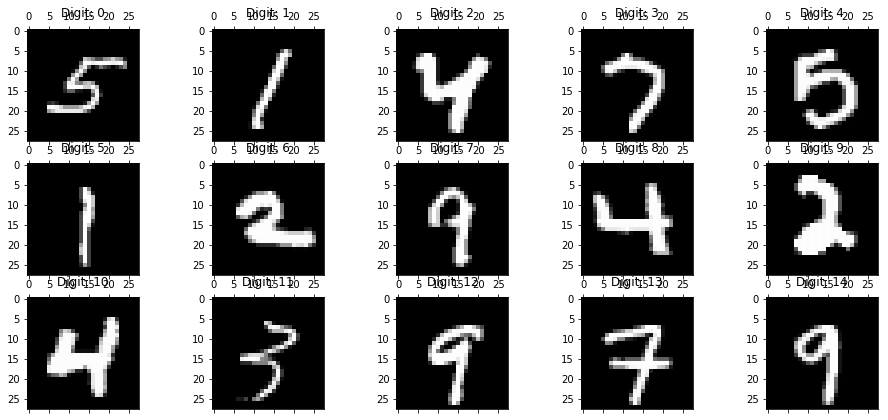

In [19]:
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,15):
    x = x_train[i]
    y = y_train[i]
    ax = fig.add_subplot(3,5,i+1, title="Digit: {}".format(str(i)))
    ax.matshow(x)
plt.show()


In [20]:
# we will just use the first 10000 samples
x_train_flatten = x_train.reshape(x_train.shape[0], np.prod(x_train.shape[1:]))
y_train_flatten = y_train.reshape(y_train.shape[0])
#x_train_flatten = x_train_flatten[0:1000]
#y_train_flatten = y_train_flatten[0:1000]
pca = PCA(n_components=3)
pca_result = pca.fit_transform(x_train_flatten)

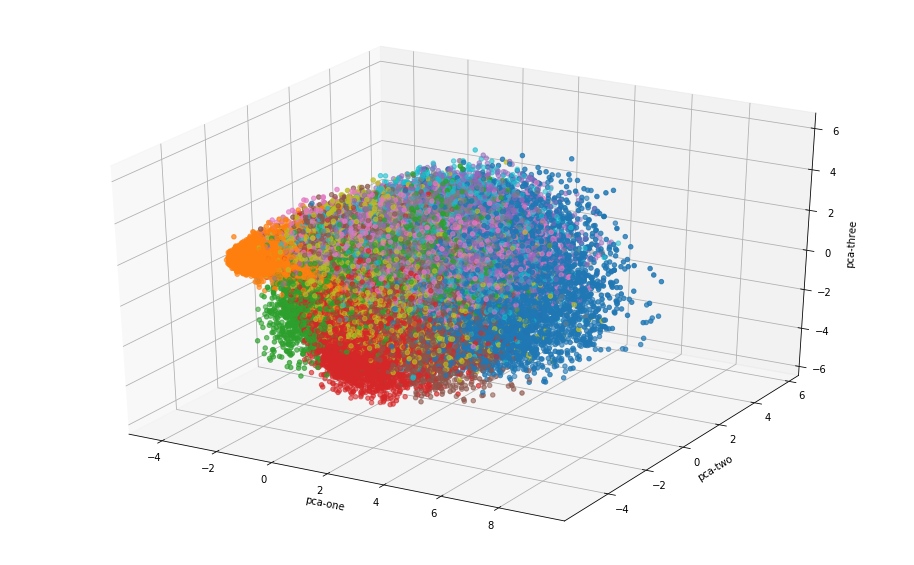

In [21]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=pca_result[:,0], 
    ys=pca_result[:,1], 
    zs=pca_result[:,2], 
    c=y_train_flatten, 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()



In [22]:
# tSNE is very expensive to compute. Let's use only 3000 samples
x_train_flatten = x_train_flatten[0:3000]
y_train_flatten = y_train_flatten[0:3000]
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(x_train_flatten)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 3000 samples in 0.074s...
[t-SNE] Computed neighbors for 3000 samples in 10.352s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3000
[t-SNE] Computed conditional probabilities for sample 2000 / 3000
[t-SNE] Computed conditional probabilities for sample 3000 / 3000
[t-SNE] Mean sigma: 2.486251
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.406982
[t-SNE] Error after 300 iterations: 1.762766
t-SNE done! Time elapsed: 36.482709884643555 seconds


In [24]:
data = {"x{}".format(i): x_train_flatten[:, i] for i in range(x_train_flatten.shape[1])}
data["y"] = y_train_flatten
df = pd.DataFrame(data)

In [25]:
df

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x775,x776,x777,x778,x779,x780,x781,x782,x783,y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


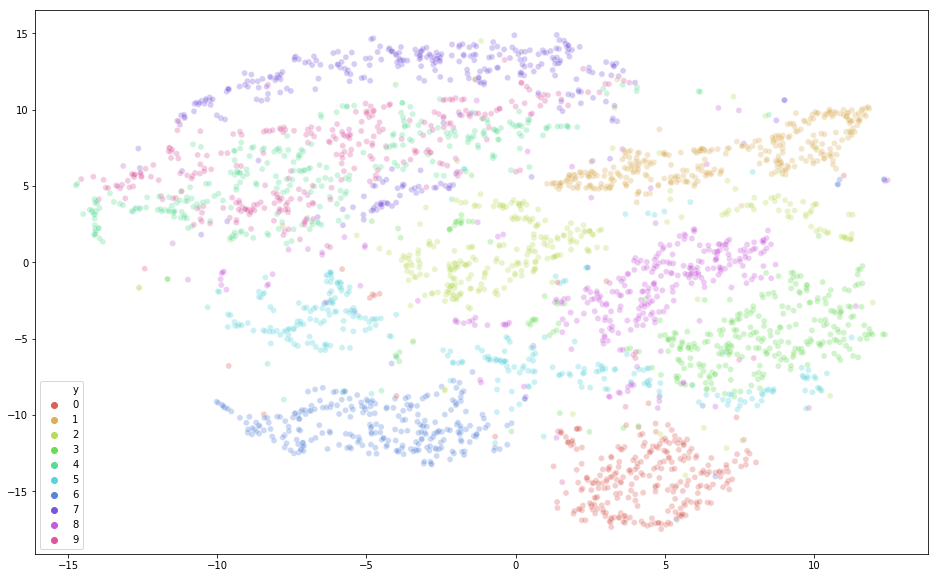

In [26]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x=tsne_results[:,0], y=tsne_results[:,1],
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df,
    legend="full",
    alpha=0.3
)


In [27]:
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(x_train_flatten)
print('Cumulative explained variation for 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))

Cumulative explained variation for 50 principal components: 0.8298113485832855


In [28]:
x_train_flatten.shape, y_train_flatten.shape

((3000, 784), (3000,))

In [29]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(pca_result_50)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 3000 samples in 0.007s...
[t-SNE] Computed neighbors for 3000 samples in 0.859s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3000
[t-SNE] Computed conditional probabilities for sample 2000 / 3000
[t-SNE] Computed conditional probabilities for sample 3000 / 3000
[t-SNE] Mean sigma: 2.286876
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.812248
[t-SNE] Error after 300 iterations: 1.692013


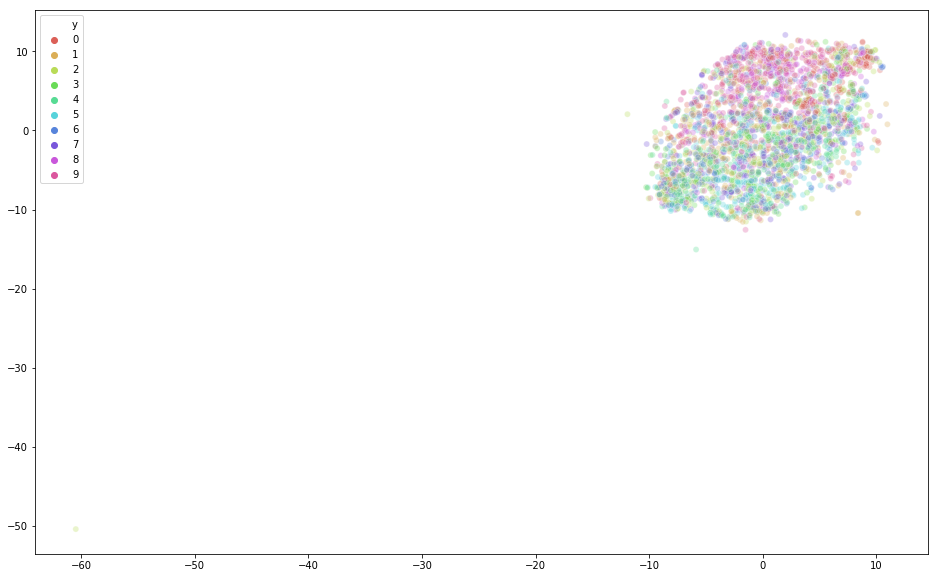

In [122]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x=tsne_results[:,0], y=tsne_results[:,1],
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df,
    legend="full",
    alpha=0.3
)

Now, you will perform the same exercise on cifar10 or cifar100.

---

## cifar10

In [126]:
from keras.datasets import cifar10, cifar100

In [127]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train

indexes = x_train.shape[0]
indexes = np.random.permutation(indexes)
x_train = x_train[indexes]
y_train = y_train[indexes]

Samples 

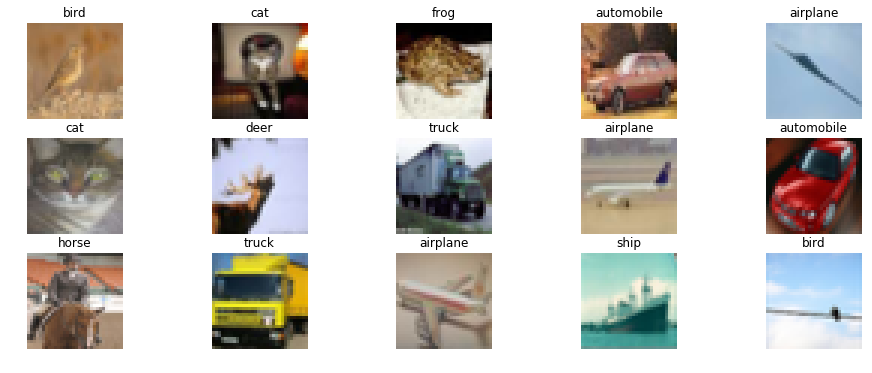

In [128]:
LABELS = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

fig = plt.figure( figsize=(16,6) )
for i in range(0,15):
    x = x_train[i]
    y = LABELS[int(y_train[i])]
    ax = fig.add_subplot(3,5,i+1, title="{}".format(y))
    ax.imshow(x)
    ax.axis('off')
plt.show()

PCA

In [129]:
x_train_flatten = x_train.reshape(x_train.shape[0], np.prod(x_train.shape[1:]))
y_train_flatten = y_train.reshape(y_train.shape[0])

pca = PCA(n_components=3)
pca_result = pca.fit_transform(x_train_flatten)

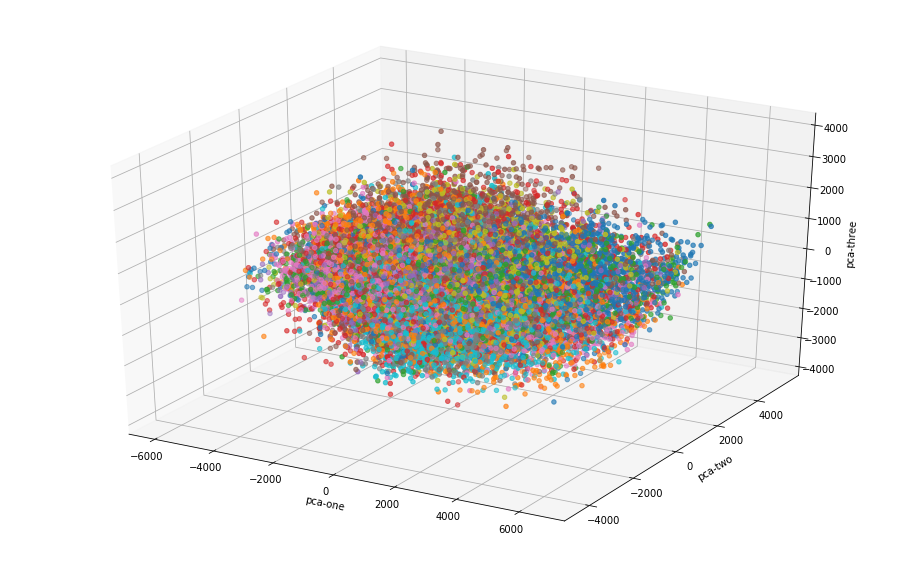

In [130]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=pca_result[:,0], 
    ys=pca_result[:,1], 
    zs=pca_result[:,2], 
    c=y_train_flatten, 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

TSNE

In [131]:
# tSNE is very expensive to compute. Let's use only 3000 samples
x_train_flatten = x_train_flatten[0:3000]
y_train_flatten = y_train_flatten[0:3000]
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(x_train_flatten)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 3000 samples in 0.543s...
[t-SNE] Computed neighbors for 3000 samples in 50.092s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3000
[t-SNE] Computed conditional probabilities for sample 2000 / 3000
[t-SNE] Computed conditional probabilities for sample 3000 / 3000
[t-SNE] Mean sigma: 780.787143
[t-SNE] KL divergence after 250 iterations with early exaggeration: 86.241035
[t-SNE] Error after 300 iterations: 2.513908
t-SNE done! Time elapsed: 88.5780680179596 seconds


In [132]:
data = {"x{}".format(i): x_train_flatten[:, i] for i in range(x_train_flatten.shape[1])}

# to_label = lambda y: LABELS[int(y_train[i])]
# label_func = np.vectorize(to_label)
data["y"] = y_train_flatten
df = pd.DataFrame(data)

In [133]:
df

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x3063,x3064,x3065,x3066,x3067,x3068,x3069,x3070,x3071,y
0,160,118,77,155,113,73,154,112,72,152,...,164,137,110,162,132,95,187,158,119,2
1,19,8,6,17,7,5,40,32,27,84,...,26,9,13,23,6,10,20,4,8,3
2,6,1,2,3,0,1,1,1,1,1,...,139,118,92,105,81,74,35,2,0,6
3,167,116,76,185,135,91,180,130,82,181,...,223,175,83,214,168,78,211,163,77,1
4,156,181,212,154,178,208,158,183,213,163,...,153,182,205,153,182,205,151,180,203,0
5,87,75,62,98,87,77,114,106,96,111,...,141,136,142,140,135,141,137,132,138,3
6,27,24,27,83,79,84,78,73,79,37,...,186,190,216,186,190,216,180,185,210,4
7,253,252,255,249,248,252,250,249,253,250,...,90,105,84,89,105,83,91,113,86,9
8,175,168,158,141,133,130,121,112,115,117,...,193,175,135,193,175,135,195,177,136,0
9,41,24,18,46,25,15,74,32,17,87,...,115,95,81,111,92,79,98,83,73,1


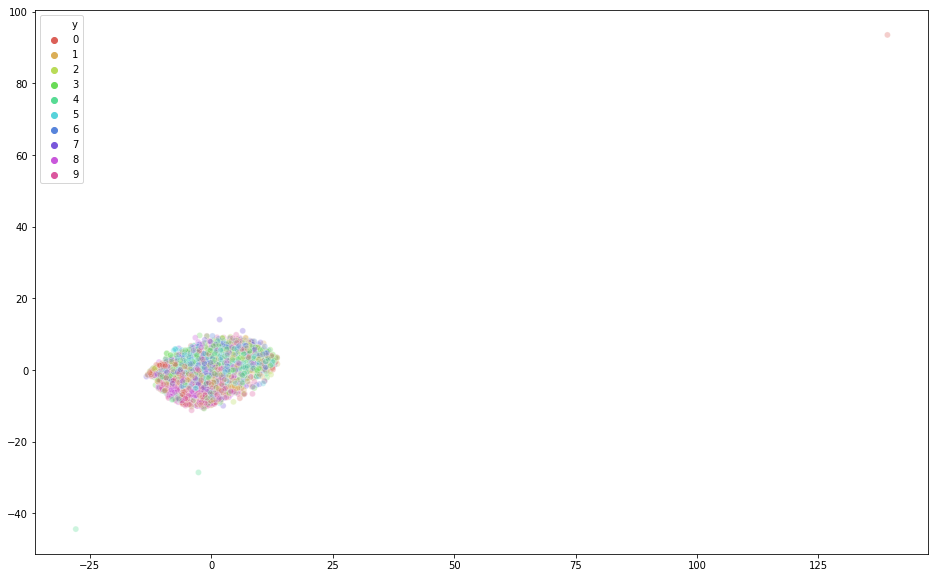

In [134]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x=tsne_results[:,0], y=tsne_results[:,1],
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df,
    legend="full",
    alpha=0.3
)

PCA50 + TSNE

In [135]:
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(x_train_flatten)
print('Cumulative explained variation for 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))

Cumulative explained variation for 50 principal components: 0.8435266941199377


In [136]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(pca_result_50)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 3000 samples in 0.007s...
[t-SNE] Computed neighbors for 3000 samples in 0.914s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3000
[t-SNE] Computed conditional probabilities for sample 2000 / 3000
[t-SNE] Computed conditional probabilities for sample 3000 / 3000
[t-SNE] Mean sigma: 734.408223
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.104767
[t-SNE] Error after 300 iterations: 2.203222


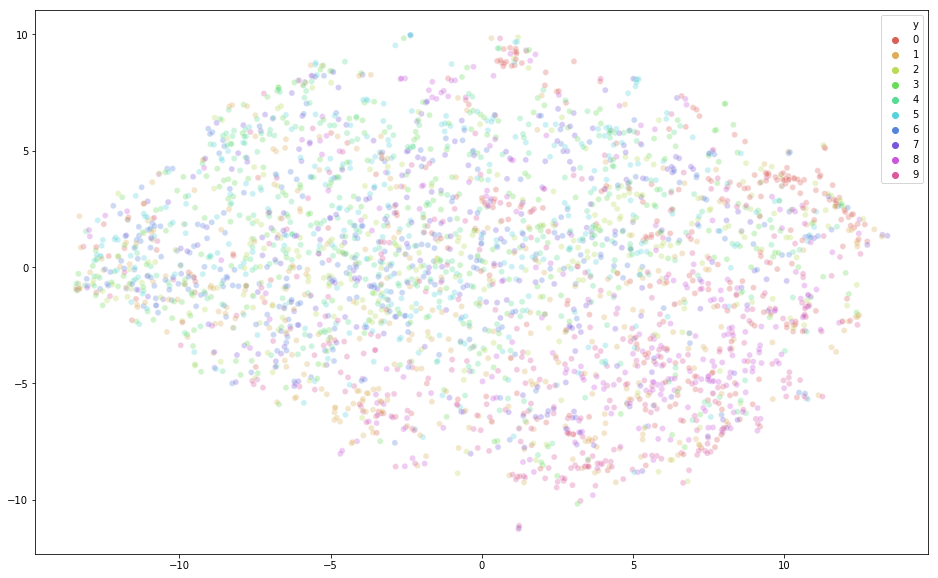

In [137]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x=tsne_results[:,0], y=tsne_results[:,1],
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df,
    legend="full",
    alpha=0.3
)

## cifar100

In [138]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

x_train = x_train

indexes = x_train.shape[0]
indexes = np.random.permutation(indexes)
x_train = x_train[indexes]
y_train = y_train[indexes]

Samples 

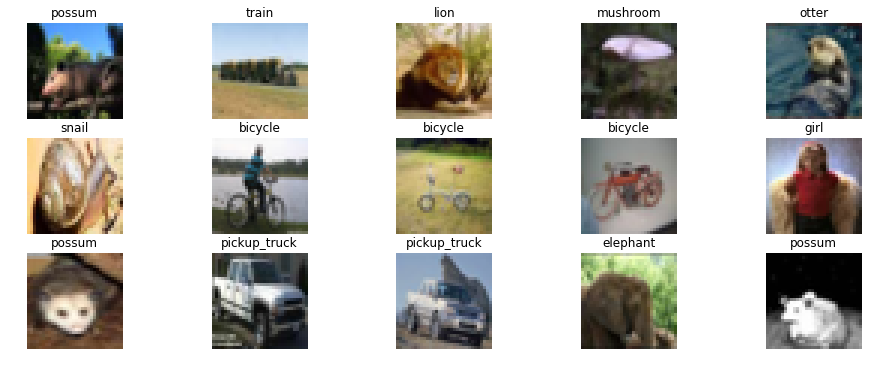

In [145]:
LABELS = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 
    'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 
    'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 
    'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 
    'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
    'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse',
    'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
    'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose',
    'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake',
    'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table',
    'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
    'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman',
    'worm'
]

fig = plt.figure( figsize=(16,6) )
for i in range(0,15):
    x = x_train[i]
    y = LABELS[int(y_train[i])]
    ax = fig.add_subplot(3,5,i+1, title="{}".format(y))
    ax.imshow(x)
    ax.axis('off')
plt.show()

PCA

In [146]:
x_train_flatten = x_train.reshape(x_train.shape[0], np.prod(x_train.shape[1:]))
y_train_flatten = y_train.reshape(y_train.shape[0])

pca = PCA(n_components=3)
pca_result = pca.fit_transform(x_train_flatten)

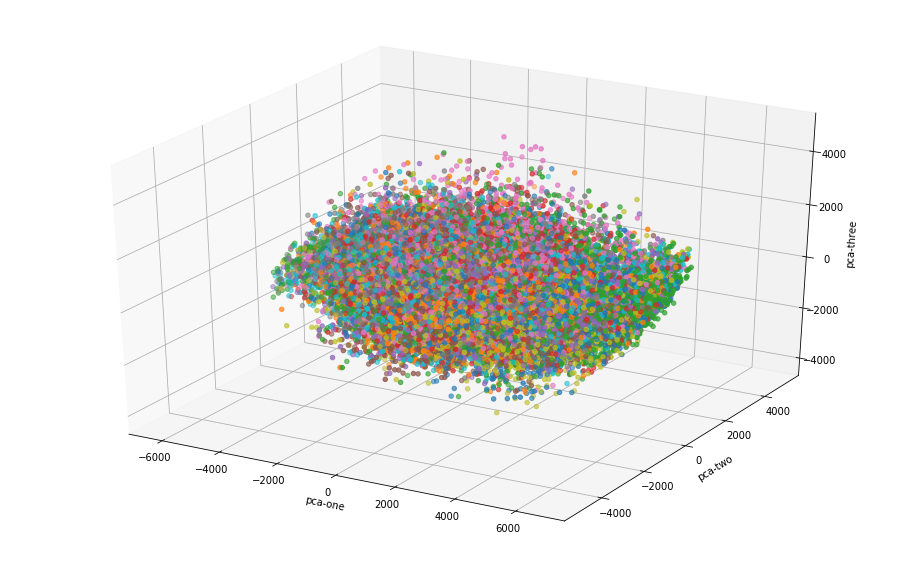

In [147]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=pca_result[:,0], 
    ys=pca_result[:,1], 
    zs=pca_result[:,2], 
    c=y_train_flatten, 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

TSNE

In [148]:
# tSNE is very expensive to compute. Let's use only 3000 samples
x_train_flatten = x_train_flatten[0:3000]
y_train_flatten = y_train_flatten[0:3000]
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(x_train_flatten)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 3000 samples in 0.699s...
[t-SNE] Computed neighbors for 3000 samples in 54.354s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3000
[t-SNE] Computed conditional probabilities for sample 2000 / 3000
[t-SNE] Computed conditional probabilities for sample 3000 / 3000
[t-SNE] Mean sigma: 841.188556
[t-SNE] KL divergence after 250 iterations with early exaggeration: 82.381783
[t-SNE] Error after 300 iterations: 2.374771
t-SNE done! Time elapsed: 93.29512906074524 seconds


In [149]:
data = {"x{}".format(i): x_train_flatten[:, i] for i in range(x_train_flatten.shape[1])}

# to_label = lambda y: LABELS[int(y_train[i])]
# label_func = np.vectorize(to_label)
data["y"] = y_train_flatten
df = pd.DataFrame(data)

In [150]:
df

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x3063,x3064,x3065,x3066,x3067,x3068,x3069,x3070,x3071,y
0,2,14,10,4,15,16,5,15,20,10,...,6,6,7,6,6,6,7,7,7,64
1,164,198,229,164,198,229,167,201,231,167,...,181,150,96,183,148,99,183,151,105,90
2,99,99,37,122,119,63,172,166,116,162,...,227,201,170,230,203,174,217,190,160,43
3,31,34,24,42,45,33,53,56,42,49,...,70,69,50,70,70,57,79,78,70,51
4,80,70,74,71,72,74,71,69,68,58,...,78,78,69,79,79,74,87,81,69,55
5,252,211,125,254,214,141,255,217,152,255,...,219,194,143,228,199,144,177,153,99,77
6,248,248,248,245,245,245,246,246,246,247,...,113,117,94,108,112,88,109,113,90,8
7,51,60,47,57,67,54,55,64,52,53,...,134,113,61,123,110,66,125,111,68,8
8,84,94,96,91,101,103,98,108,110,107,...,47,43,40,47,42,39,46,41,38,8
9,136,138,146,142,146,157,143,148,164,141,...,44,37,28,30,24,17,26,23,17,35


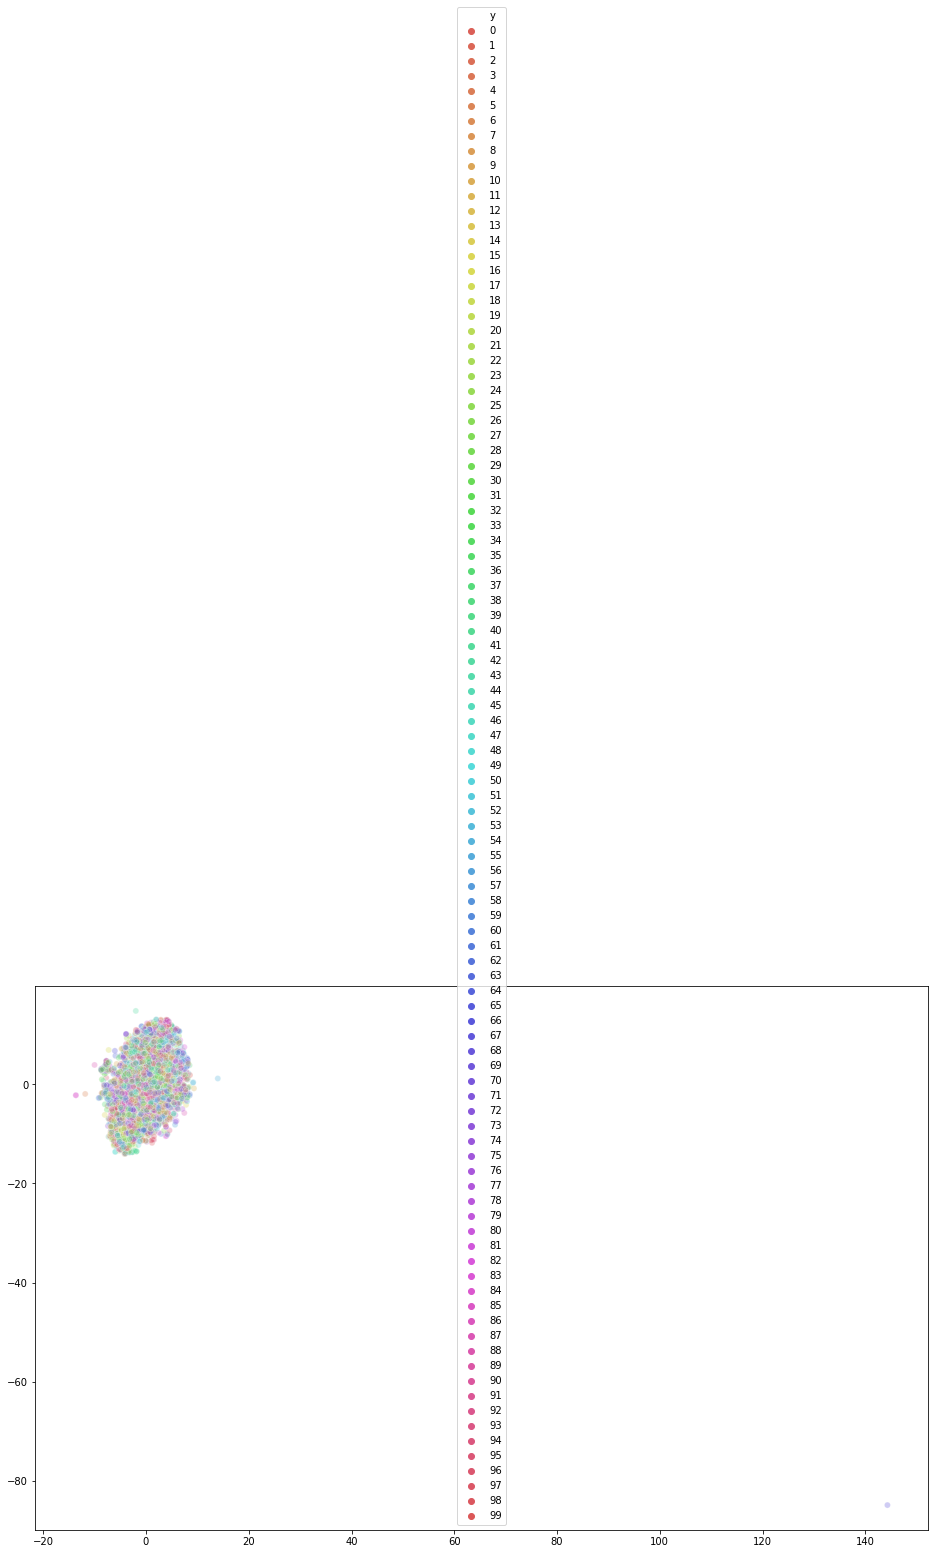

In [152]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x=tsne_results[:,0], y=tsne_results[:,1],
    hue="y",
    palette=sns.color_palette("hls", 100),
    data=df,
    legend="full",
    alpha=0.3
)

PCA50 + TSNE

In [153]:
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(x_train_flatten)
print('Cumulative explained variation for 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))

Cumulative explained variation for 50 principal components: 0.8623834533254416


In [154]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(pca_result_50)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 3000 samples in 0.005s...
[t-SNE] Computed neighbors for 3000 samples in 0.656s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3000
[t-SNE] Computed conditional probabilities for sample 2000 / 3000
[t-SNE] Computed conditional probabilities for sample 3000 / 3000
[t-SNE] Mean sigma: 740.640685
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.704155
[t-SNE] Error after 300 iterations: 2.174990


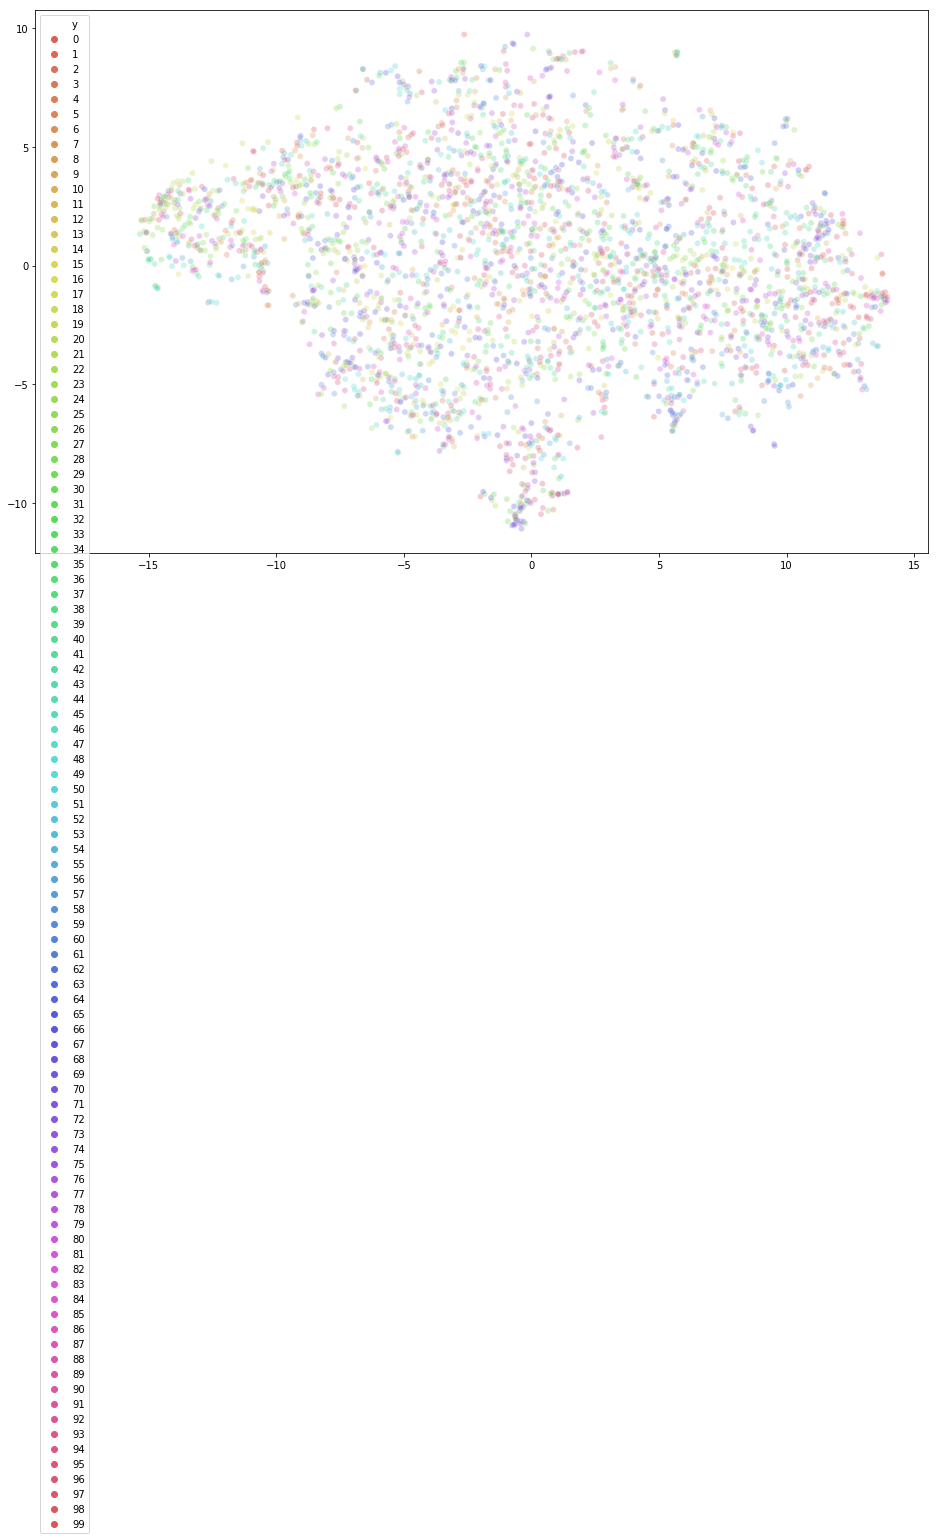

In [155]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x=tsne_results[:,0], y=tsne_results[:,1],
    hue="y",
    palette=sns.color_palette("hls", 100),
    data=df,
    legend="full",
    alpha=0.3
)